In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO: 2016-06-30 11:03:00,331 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [23]:
logger.setLevel(logging.DEBUG)

In [3]:
import glob

In [4]:
cd1_fns = glob.glob('/artemis/readout/2016-06-26_1*scan_lo*.nc')
cd1_fns.sort()
cd1_fns = cd1_fns[:4]
print cd1_fns

['/artemis/readout/2016-06-26_103846_scan_lo_830.0_MHz.nc', '/artemis/readout/2016-06-26_103928_scan_lo_1020.0_MHz.nc', '/artemis/readout/2016-06-26_104010_scan_lo_1210.0_MHz.nc', '/artemis/readout/2016-06-26_104052_scan_lo_1400.0_MHz.nc']


In [12]:
cd2_fns = glob.glob('/artemis/readout/2016-06-30_14*scan*.nc')
cd2_fns.sort()
#cd2_fns = cd2_fns[:4]
print cd2_fns

['/artemis/readout/2016-06-30_141523_scan_lo_830.0_MHz_modulated_mmw_source.nc', '/artemis/readout/2016-06-30_141609_scan_lo_1020.0_MHz_modulated_mmw_source.nc', '/artemis/readout/2016-06-30_141656_scan_lo_1210.0_MHz_modulated_mmw_source.nc', '/artemis/readout/2016-06-30_141743_scan_lo_1400.0_MHz_modulated_mmw_source.nc']


In [17]:
cd3_fns = glob.glob('/artemis/readout/2016-06-30_11*scan*.nc')
cd3_fns.sort()
#cd2_fns = cd2_fns[:4]
print cd3_fns

['/artemis/readout/2016-06-30_110059_scan_lo_830.0_MHz.nc', '/artemis/readout/2016-06-30_110142_scan_lo_1020.0_MHz.nc', '/artemis/readout/2016-06-30_110225_scan_lo_1210.0_MHz.nc', '/artemis/readout/2016-06-30_110309_scan_lo_1400.0_MHz.nc']


In [6]:
import pandas as pd

In [7]:
def load_sweep_array(fn):
    ncf = NCFile(fn)
    sa = ncf.SweepArray0
    ncf.close()
    return sa.to_dataframe(one_sweep_per_row=False)

In [8]:
cd1_rows = [load_sweep_array(fn) for fn in cd1_fns]
df1 = pd.concat(cd1_rows,ignore_index=True)

In [13]:
cd2_rows = [load_sweep_array(fn) for fn in cd2_fns]
df2 = pd.concat(cd2_rows,ignore_index=True)

In [18]:
cd3_rows = [load_sweep_array(fn) for fn in cd3_fns]
df3 = pd.concat(cd3_rows,ignore_index=True)

In [10]:
import time

<IPython.core.display.Javascript object>


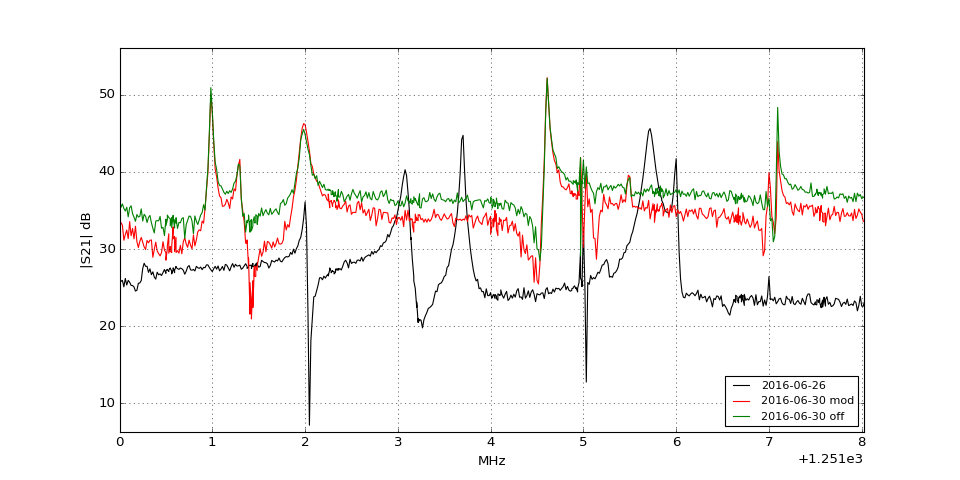

(-20, 60)

In [19]:
figure(figsize=(12,6))
for color,df,label in [('k',df1,'2016-06-26'),
                ('r',df2,'2016-06-30 mod'),
                       ('g',df3,'2016-06-30 off')
                      ]:
    for k,row in df.iterrows():
        if k > 0:
            label = None
        plot(row.frequency/1e6,dB(row.s21_point),color=color,label=label)
legend(loc='lower right',prop=dict(size='small'))
grid()
ylabel('|S21| dB')
xlabel('MHz')
ylim(-20,60)

In [20]:
from kid_readout.analysis.resonator import find_resonators

In [28]:
allres = find_resonators.find_resonators(df3.frequency.iloc[1],df3.s21_point.iloc[1],df3.s21_point_error.iloc[1],make_plot=True,detect_peaks_threshold=10)

DEBUG: 2016-07-02 22:04:45,934 - kid_readout.analysis.resonator.find_resonators.find_resonators:22  Found 427 peaks
INFO: 2016-07-02 22:05:00,526 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 1037313805.1  1036925011.6
INFO: 2016-07-02 22:05:20,986 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 1057100161.7  1057031308.8
INFO: 2016-07-02 22:05:21,557 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 1057234375.0  1057234375.0
INFO: 2016-07-02 22:06:42,515 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 1059690736.3  1059239360.3
INFO: 2016-07-02 22:06:42,890 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 1059689125.6  1059245956.1
INFO: 2016-07-02 22:07:48,644 - kid_readout.analysis.resonator.f

In [35]:
clean = find_resonators.remove_duplicates(allres,tolerance=512e6/2.**13)

found duplicate of  1024074368.96 distance 7644.75468528
found duplicate of  1031587599.44 distance 15398.9929049
found duplicate of  1032039693.46 distance 2328.14840484
found duplicate of  1032038105.02 distance 739.702161312
found duplicate of  1032045954.26 distance 8588.94139862
found duplicate of  1040520092.34 distance 7.66369581223
found duplicate of  1040520083.32 distance 16.6770195961
found duplicate of  1040520072.26 distance 27.7384605408
found duplicate of  1040519958.85 distance 141.150272846
found duplicate of  1042704490.85 distance 23.6504198313
found duplicate of  1042704126.74 distance 340.454500914
found duplicate of  1049138196.78 distance 191.1676476
found duplicate of  1054425335.32 distance 13040.1733652
found duplicate of  1057157853.02 distance 4444.75466299
found duplicate of  1057152002.78 distance 1405.49443698
found duplicate of  1057180564.08 distance 27155.8129195
found duplicate of  1058234375.0 distance 15625.0160528
found duplicate of  1057891753.11 

In [37]:
len(clean)

195

<IPython.core.display.Javascript object>


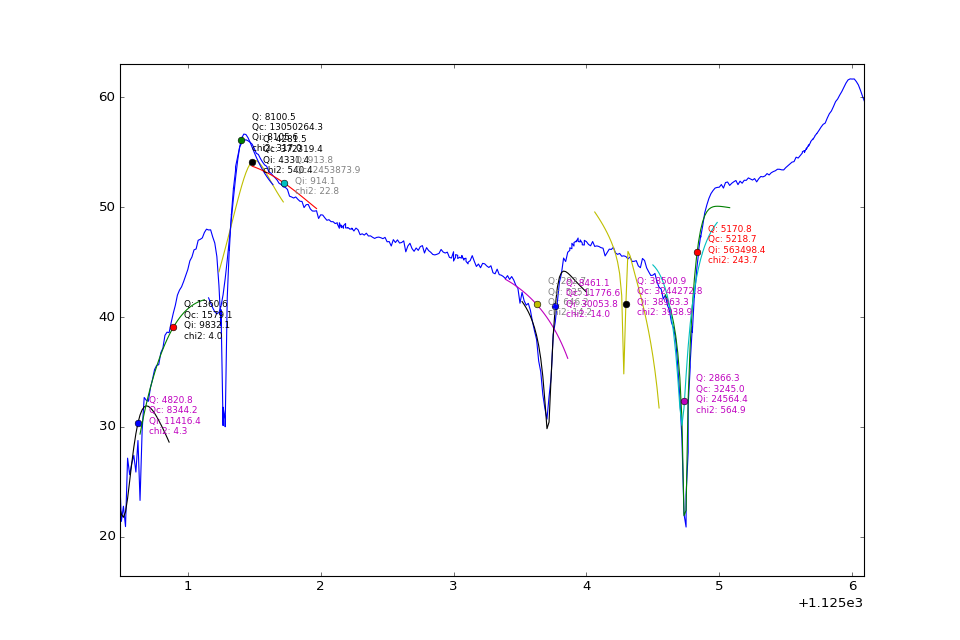

In [36]:
figure(figsize=(12,8))
find_resonators.plot_results(df3.frequency.iloc[1],df3.s21_point.iloc[1],clean,annotate=True)

In [41]:
1e6/(512e6/2**15.)

64.0

In [42]:
np.arange(10).sort()